# Library

In [63]:
import numpy as np
import pandas as pd
import tensorflow as tf
from IPython.display import Image
import matplotlib.pyplot as plt
import functools

from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Input, MaxPooling1D, Conv1D, Embedding,Reshape, Concatenate,BatchNormalization,GlobalMaxPooling1D,GlobalAveragePooling1D
# from keras.layers.merge import Concatenate
from keras.preprocessing import sequence
from keras.optimizers import RMSprop, Adam
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.utils import plot_model
from keras import regularizers
from keras import metrics
from keras import backend as K
# from keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import classification_report
import pydot_ng as pydot
from sklearn.compose import make_column_selector


In [64]:
print(pydot.find_graphviz())

None


# Training data

In [65]:
data = pd.read_csv('C:/Users/ASUS/Documents/Data mining/splited_RASFF_DATA_16092019.csv', sep=';', 
                header=0, index_col = 0)
data = data.sample(frac = 1)
df = data 
df

,DATE_CASE,NOT_COUNTRY,PROD_CAT,TYPE,RISK_DECISION,ACTION_TAKEN,DISTRIBUTION_STAT,HAZARDS_CAT,COUNT_ORIGEN,COUNT_DESTIN,COUNT_CONCERN
4986,2019-04-18,Germany,fruits and vegetables,food,serious,official detention,information on distribution not (yet) available,composition,Syria,,Germany
15381,2018-07-26,Slovenia,food contact materials,fcm,serious,withdrawal from the market,distribution to other member countries,industrial contaminants,China,Croatia,Belgium
51072,2015-10-30,Poland,food contact materials,fcm,serious,informing authorities,distribution to other member countries,migration,Hong Kong,Finland,Commission Services
66732,2014-04-04,Germany,feed materials,feed,serious,withdrawal from the market,distribution to other member countries,environmental pollutants,Poland,Austria,
118016,2008-02-01,Sweden,fish and fish products,food,undecided,withdrawal from the market,distribution on the market (possible),labelling absent/incomplete/incorrect,Germany,Sweden,
...,...,...,...,...,...,...,...,...,...,...,...
29212,2017-10-17,Netherlands,"nuts, nut products and seeds",food,serious,physical/chemical treatment,product not (yet) placed on the market,mycotoxins,Bolivia,,Netherlands
92870,2011-06-24,Czech Republic,"nuts, nut products and seeds",food,undecided,,distribution restricted to notifying country,natural toxins (other),Netherlands,Slovakia,
29278,2017-10-10,Italy,eggs and egg products,food,not serious,informing recipient(s),distribution restricted to notifying country,pesticide residues,Italy,Italy,
134217,2005-05-25,Spain,"nuts, nut products and seeds",food,undecided,re-dispatch,no distribution,mycotoxins,Iran,,Spain


# Preprocessing

In [66]:
df['HAZARDS_CAT'] = df['HAZARDS_CAT'].astype(str)
df['DATE_CASE'] = df['DATE_CASE'].astype(str)
df['DATE_CASE'] =pd.to_datetime(df.DATE_CASE)
df['DATE_CASE'] = df.DATE_CASE.dt.month

# Select the features

In [67]:
features = [0, 1, 6, 8]
target = [2]


# Extract the features and target

X = df.iloc[:, features]
y = df.iloc[:, target]



In [68]:
X

,DATE_CASE,NOT_COUNTRY,DISTRIBUTION_STAT,COUNT_ORIGEN
4986,4,Germany,information on distribution not (yet) available,Syria
15381,7,Slovenia,distribution to other member countries,China
51072,10,Poland,distribution to other member countries,Hong Kong
66732,4,Germany,distribution to other member countries,Poland
118016,2,Sweden,distribution on the market (possible),Germany
...,...,...,...,...
29212,10,Netherlands,product not (yet) placed on the market,Bolivia
92870,6,Czech Republic,distribution restricted to notifying country,Netherlands
29278,10,Italy,distribution restricted to notifying country,Italy
134217,5,Spain,no distribution,Iran


In [69]:
y

,PROD_CAT
4986,fruits and vegetables
15381,food contact materials
51072,food contact materials
66732,feed materials
118016,fish and fish products
...,...
29212,"nuts, nut products and seeds"
92870,"nuts, nut products and seeds"
29278,eggs and egg products
134217,"nuts, nut products and seeds"


In [70]:

# df = pd.DataFrame(y)


# # Create an instance of OneHotEncoder

# encoder = OneHotEncoder(sparse_output=False)  # Use sparse_output=False to return a dense array



# # Fit and transform the data

# encoded_data = encoder.fit_transform(df[['PROD_CAT']])


# # Convert the encoded data to a DataFrame

# encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['PROD_CAT']))


# # Concatenate the original DataFrame and the encoded DataFrame

# final_df = pd.concat([df, encoded_df], axis=1)


# # Drop the original product_category column if desired

# # final_df = final_df.drop('product_category', axis=1)



# # Print the final DataFrame

# print(final_df)


In [71]:
# Initialize the OneHotEncoder with sparse_output instead of sparse
encX = OneHotEncoder(handle_unknown='ignore')
ency = OneHotEncoder(handle_unknown='ignore', sparse_output=False)


# Fit the encoder to your data
encX.fit(X.values)
ency.fit(y.values)


# Transform the data to one-hot encoded format
X_one_hot = encX.transform(X.values)
y_one_hot = ency.transform(y.values)
y_one_hot.shape

(141529, 38)

# Test data

## Loading

In [72]:
data = pd.read_csv('C:/Users/ASUS/Documents/Data mining/splited_2019_RASFF_DATA_16092019.csv', sep=';', 
                header=0, index_col = 0)
data = data.sample(frac = 1)
test = data
test

,DATE_CASE,NOT_COUNTRY,PROD_CAT,TYPE,RISK_DECISION,ACTION_TAKEN,DISTRIBUTION_STAT,HAZARDS_CAT,COUNT_ORIGEN,COUNT_DESTIN,COUNT_CONCERN
281,2019-09-05,Germany,feed materials,feed,undecided,detained by operator,no distribution from notifying country,pesticide residues,India,Germany,Netherlands
9662,2019-01-14,Austria,meat and meat products (other than poultry),food,serious,no action taken,product (presumably) no longer on the market,allergens,Italy,Austria,
3078,2019-06-17,Germany,"cocoa and cocoa preparations, coffee and tea",food,serious,withdrawal from the market,distribution to other member countries,pesticide residues,Syria,Norway,Bulgaria
5407,2019-04-08,Belgium,feed materials,feed,not serious,official detention,no distribution from notifying country,pesticide residues,France,Netherlands,
3472,2019-06-11,Slovakia,"nuts, nut products and seeds",food,serious,withdrawal from recipient(s),distribution to other member countries,allergens,Czech Republic,Poland,INFOSAN
...,...,...,...,...,...,...,...,...,...,...,...
3492,2019-06-07,Germany,feed materials,feed,serious,withdrawal from the market,distribution to other member countries,environmental pollutants,China,Germany,INFOSAN
572,2019-08-23,Portugal,fruits and vegetables,food,serious,,distribution to other member countries,pesticide residues,Spain,Belgium,
2437,2019-07-05,France,milk and milk products,food,serious,recall from consumers,product (presumably) no longer on the market,microbial contaminants (other),,Denmark,INFOSAN
9713,2019-01-08,Austria,pet food,feed,serious,withdrawal from the market,distribution to other member countries,pathogenic micro-organisms,Belgium,Poland,Germany


## Preprocesamiento

In [73]:
test['HAZARDS_CAT'] = test['HAZARDS_CAT'].astype(str)
test['DATE_CASE'] = test['DATE_CASE'].astype(str)
test['DATE_CASE'] =pd.to_datetime(test.DATE_CASE)
test['DATE_CASE'] = test.DATE_CASE.dt.month

## Features

In [74]:
features = [0,1,6,8]
target = [2]
X_val = test.iloc[:,features]
y_val = test.iloc[:,target]

In [75]:
y_val_one_hot = ency.transform(y_val.values)
X_val.shape

(9835, 4)

# Split train-test-val

In [76]:
categoical_vars = ['DATE_CASE','NOT_COUNTRY','DISTRIBUTION_STAT','COUNT_ORIGEN']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2)
X_test.shape


(28306, 4)

In [78]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42,shuffle = True)
y_val.shape


(28306, 38)

# Coding and conversion to lists to be able to add it to the model

In [79]:
def preproc(X_train, X_test, Xvalidation_data):
    input_list_train = []
    input_list_test = []
    input_list_testval = []
    
    for c in categoical_vars:
        raw_vals = np.unique(X_train[c])
        val_map = {}
        for i in range(len(raw_vals)):
            val_map[raw_vals[i]] = i       
        
        input_list_train.append(X_train[c].map(val_map).values)
        input_list_test.append(X_test[c].map(val_map).fillna(0).values)
        input_list_testval.append(X_val[c].map(val_map).fillna(0).values)

    return input_list_train, input_list_test,input_list_testval

In [80]:
input_list_train,input_list_test,input_list_testval = preproc(X_train,X_test, X_val)
print(f"Shape of input_list_testval: {[x for x in input_list_train]}")
print(f"Shape of y_val_one_hot: {X_train.shape}")

Shape of input_list_testval: [array([7, 8, 7, ..., 6, 7, 9], dtype=int64), array([11, 21, 23, ..., 16, 23,  1], dtype=int64), array([4, 4, 2, ..., 6, 2, 4], dtype=int64), array([181, 135,  32, ...,  21,  32,  32], dtype=int64)]
Shape of y_val_one_hot: (113223, 4)


# Definition of metrics

In [81]:
top3_acc = functools.partial(metrics.top_k_categorical_accuracy, k=3)
top3_acc.__name__ = 'top3_acc'

top2_acc = functools.partial(metrics.top_k_categorical_accuracy, k=3)
top2_acc.__name__ = 'top2_acc'

In [82]:
def top_1_categorical_accuracy(y_true, y_pred):
    return metrics.top_k_categorical_accuracy(y_true, y_pred, k=1) 

In [83]:
def top_2_categorical_accuracy(y_true, y_pred):
    return metrics.top_k_categorical_accuracy(y_true, y_pred, k=2) 

In [84]:
def top_3_categorical_accuracy(y_true, y_pred):
    return metrics.top_k_categorical_accuracy(y_true, y_pred, k=3) 

# Embeddings + mlp model (cases 1 and 3)

In [23]:
input_models=[]
output_embeddings=[]

for categorical_var in categoical_vars:
    cat_emb_name= categorical_var.replace(" ", "")+'_Embedding'
    input_name= 'Input_' + categorical_var.replace(" ", "")
    no_of_unique_cat  = X_train[categorical_var].nunique()
    embedding_size = int(min(np.ceil((no_of_unique_cat)/2), 50 ))
   
    input_model = Input(shape=(1,), name=input_name)
    output_model = Embedding(no_of_unique_cat, embedding_size, name=cat_emb_name)(input_model)
    output_model = Reshape(target_shape=(embedding_size,))(output_model)    
    
    input_models.append(input_model)
    output_embeddings.append(output_model)
  

output = Concatenate()(output_embeddings)
output = Dense(2048,activation="relu")(output)
output= Dropout(0.3)(output)
output = Dense(1024,activation="relu")(output)
output= Dropout(0.2)(output)
output = Dense(512,activation="relu")(output)
output= Dropout(0.2)(output)
output = Dense(38, activation='softmax')(output)
model = Model(inputs=input_models, outputs=output)

In [24]:
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy', top_1_categorical_accuracy,top_2_categorical_accuracy,top_3_categorical_accuracy])

In [25]:
 hist = model.fit(input_list_train,y_train,validation_data=(input_list_test,y_test) , epochs = 5 , batch_size = 64, verbose=1)

Epoch 1/5
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.3824 - loss: 2.2604 - top_1_categorical_accuracy: 0.3824 - top_2_categorical_accuracy: 0.5098 - top_3_categorical_accuracy: 0.5914 - val_accuracy: 0.5362 - val_loss: 1.6644 - val_top_1_categorical_accuracy: 0.5362 - val_top_2_categorical_accuracy: 0.6652 - val_top_3_categorical_accuracy: 0.7357
Epoch 2/5
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 37s 21ms/step - accuracy: 0.5509 - loss: 1.5985 - top_1_categorical_accuracy: 0.5509 - top_2_categorical_accuracy: 0.6805 - top_3_categorical_accuracy: 0.7524 - val_accuracy: 0.6008 - val_loss: 1.4096 - val_top_1_categorical_accuracy: 0.6008 - val_top_2_categorical_accuracy: 0.7320 - val_top_3_categorical_accuracy: 0.7946
Epoch 3/5
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 37s 21ms/step - accuracy: 0.6024 - loss: 1.3867 - top_1_categorical_accuracy: 0.6024 - top_2_categorical_accuracy: 0.7336 - top_3_categorical_accuracy: 0.7988 - val_accuracy: 0.6271 - val_loss: 1.2917 - val_top_1_categorical_accu

In [26]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Input_DATE_CASE (InputLayer)  │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Input_NOT_COUNTRY             │ (None, 1)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Input_DISTRIBUTION_STAT       │ (None, 1)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Input_COUNT_ORIGEN            │ (None, 1)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ DATE_CASE_Embedding           │ (None, 1, 6)              │              72 │ Input_DATE_CASE[0][0]      │
│ (Embedding)                   │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ NOT_COUNTRY_Embedding         │ (None, 1, 16)             │             512 │ Input_NOT_COUNTRY[0][0]    │
│ (Embedding)                   │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ DISTRIBUTION_STAT_Embedding   │ (None, 1, 9)              │             153 │ Input_DISTRIBUTION_STAT[0… │
│ (Embedding)                   │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ COUNT_ORIGEN_Embedding        │ (None, 1, 50)             │           9,350 │ Input_COUNT_ORIGEN[0][0]   │
│ (Embedding)                   │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ reshape (Reshape)             │ (None, 6)                 │               0 │ DATE_CASE_Embedding[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ reshape_1 (Reshape)           │ (None, 16)                │               0 │ NOT_COUNTRY_Embedding[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ reshape_2 (Reshape)           │ (None, 9)                 │               0 │ DISTRIBUTION_STAT_Embeddi… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ reshape_3 (Reshape)           │ (None, 50)                │               0 │ COUNT_ORIGEN_Embedding[0]… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate (Concatenate)     │ (None, 81)                │               0 │ reshape[0][0],             │
│                               │                           │                 │ reshape_1[0][0],           │
│                               │                           │               

 Total params: 8,461,481 (32.28 MB)

 Trainable params: 2,820,493 (10.76 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,640,988 (21.52 MB)

## Obtaining average returns

In [27]:
print(f"Shape of input_list_testval: {[x.shape for x in input_list_test]}")
print(f"Shape of y_val_one_hot: {y_test.shape}")

Shape of input_list_testval: [(28306,), (28306,), (28306,), (28306,)]
Shape of y_val_one_hot: (28306, 38)


In [28]:
historials = []
evaluations = []
for i in range (1,6):
    model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy', top_1_categorical_accuracy,top_2_categorical_accuracy,top_3_categorical_accuracy])
    hist = model.fit(input_list_train,y_train,validation_data=(input_list_test,y_test) , epochs = 25 , batch_size = 64, verbose=0)
    historials.append(hist)
    evaluation = model.evaluate(x = input_list_testval, y =  y_val)
    evaluations. append(evaluation)
    model.save ("model"+str(i)+".h5")

885/885 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7828 - loss: 0.6088 - top_1_categorical_accuracy: 0.7828 - top_2_categorical_accuracy: 0.9036 - top_3_categorical_accuracy: 0.9446


885/885 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7846 - loss: 0.5893 - top_1_categorical_accuracy: 0.7846 - top_2_categorical_accuracy: 0.9057 - top_3_categorical_accuracy: 0.9479


885/885 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7848 - loss: 0.5793 - top_1_categorical_accuracy: 0.7848 - top_2_categorical_accuracy: 0.9066 - top_3_categorical_accuracy: 0.9473


885/885 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7855 - loss: 0.5694 - top_1_categorical_accuracy: 0.7855 - top_2_categorical_accuracy: 0.9100 - top_3_categorical_accuracy: 0.9504


885/885 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7826 - loss: 0.5695 - top_1_categorical_accuracy: 0.7826 - top_2_categorical_accuracy: 0.9065 - top_3_categorical_accuracy: 0.9481


In [29]:
suma = 0
for i in evaluations:
    suma = suma + i[2]
print(suma/5)

0.7856920838356019


In [30]:
model.evaluate(x = input_list_testval, y = y_val)

885/885 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7826 - loss: 0.5695 - top_1_categorical_accuracy: 0.7826 - top_2_categorical_accuracy: 0.9065 - top_3_categorical_accuracy: 0.9481


[0.5631259083747864,
 0.7855931520462036,
 0.7855931520462036,
 0.9095597863197327,
 0.9505405426025391]

## Training Charts

In [31]:
model.metrics_names

['loss', 'compile_metrics']

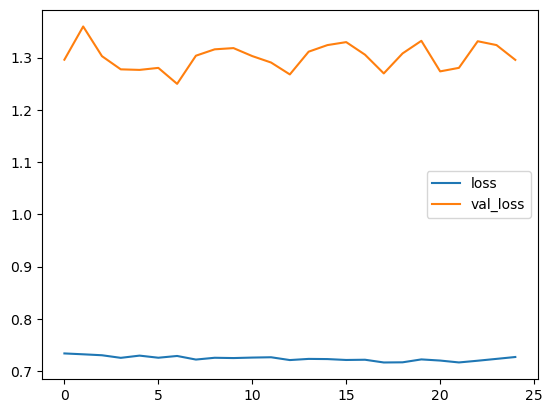

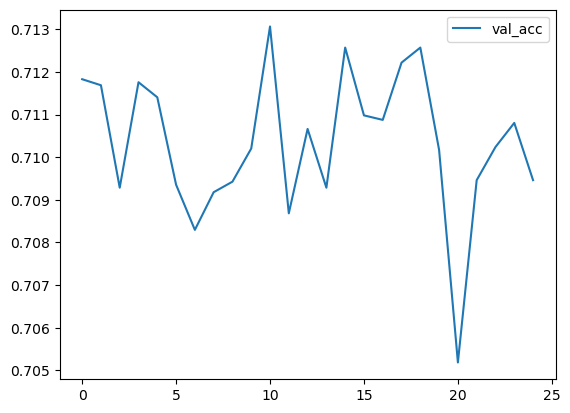

In [32]:
plt.plot(hist.history['loss'], label = 'loss') 
plt.plot(hist.history['val_loss'], label = 'val_loss') 
plt.legend()
plt.show()


plt.plot(hist.history['val_top_1_categorical_accuracy'], label = 'val_acc') 
plt.legend()
plt.show()

## Models Figure

In [33]:

plot_model(model, to_file='model3.png',show_shapes=True,show_layer_names=True)
Image(retina=True, filename='model3.png')

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


FileNotFoundError: [Errno 2] No such file or directory: 'model3.png'

## Dự đoán và biến đổi ngược lại ( chuyển đổi dự đoán số và phân loại dự đoán)

In [34]:
prediction = model.predict(input_list_test)
prediction[0]

885/885 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step


array([8.9267851e-13, 5.5718979e-27, 6.9076468e-12, 2.5447744e-09,
       1.6969184e-10, 7.6584649e-05, 1.7387691e-06, 6.5410788e-11,
       7.3494930e-06, 6.3297298e-11, 1.0439248e-04, 2.4095232e-07,
       1.6871478e-06, 1.6640057e-13, 2.6460961e-07, 1.8556963e-06,
       1.0107689e-21, 5.0550807e-07, 5.4987338e-12, 9.2506225e-10,
       1.5082160e-02, 1.5271157e-30, 9.4658100e-07, 9.9661726e-08,
       2.8576065e-12, 1.4521123e-05, 6.7105492e-07, 6.6621974e-14,
       4.0103679e-10, 6.8329318e-05, 9.8463422e-01, 9.7385157e-07,
       1.3314888e-11, 6.2111940e-07, 2.0810457e-06, 7.1384540e-07,
       2.1325029e-15, 1.2123093e-14], dtype=float32)

In [35]:
pred = np.around(prediction[12],decimals = 2)
pred

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.89, 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.11, 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  ], dtype=float32)

In [36]:
np.where(pred == 0.97)

(array([], dtype=int64),)

In [37]:
pred[25] = 1

In [38]:
ency.inverse_transform(np.around(pred.reshape(1, -1),decimals = 3)) #Predicción

array([['meat and meat products (other than poultry)']], dtype=object)

In [39]:
ency.inverse_transform(np.around(y_test[25].reshape(1, -1),decimals = 1)) #Realidad

array([['food contact materials']], dtype=object)

## Pruebas grid search

In [51]:
def create_model(activation = 'relu' ):
    input_models=[]
    output_embeddings=[]
    combi_input = Input((3,)) # (None, 3)

    for categorical_var in categoical_vars:
        
        cat_emb_name= categorical_var.replace(" ", "")+'_Embedding'
        input_name= 'Input_' + categorical_var.replace(" ", "")
        no_of_unique_cat  = X_train[categorical_var].nunique()
        embedding_size = int(min(np.ceil((no_of_unique_cat)/2), 50 ))
        input_model = Input(shape=(1,), name=input_name)
        output_model = Embedding(no_of_unique_cat, embedding_size, name=cat_emb_name)(input_model)
        output_model = Reshape(target_shape=(embedding_size,))(output_model)    
        input_models.append(input_model)
        output_embeddings.append(output_model)



    output = Concatenate()(output_embeddings)
    output = Dense(2500,activation=activation)(output)
    output= Dropout(0.5)(output)
    output = Dense(1500,activation=activation)(output)
    output= Dropout(0.4)(output)
    output = Dense(1000,activation=activation)(output)
    output= Dropout(0.3)(output)
    output = Dense(38, activation='softmax')(output)
    model = Model(inputs=input_models, outputs=output)
    model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['categorical_accuracy'])
    return model

In [52]:
model = KerasClassifier(model=create_model, verbose=1,batch_size = 512, epochs = 3)

In [53]:
input_list_train = [np.array(arr) for arr in input_list_train]
input_list_test = [np.array(arr) for arr in input_list_test]


In [55]:
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid ={
    'model__activation':activation,
    }

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=2)

grid_result = grid.fit(input_list_train[0],y_train)


ValueError: 
All the 16 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\scikeras\wrappers.py", line 1501, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\scikeras\wrappers.py", line 770, in fit
    self._fit(
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\scikeras\wrappers.py", line 925, in _fit
    X, y = self._initialize(X, y)
           ^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\scikeras\wrappers.py", line 853, in _initialize
    X, y = self._validate_data(X, y, reset=True)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\scikeras\wrappers.py", line 626, in _validate_data
    X, y = check_X_y(
           ^^^^^^^^^^
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1273, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1045, in check_array
    raise ValueError(msg)
ValueError: Expected 2D array, got 1D array instead:
array=[ 9 10  3 ...  6  7  5].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\scikeras\wrappers.py", line 1501, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\scikeras\wrappers.py", line 770, in fit
    self._fit(
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\scikeras\wrappers.py", line 925, in _fit
    X, y = self._initialize(X, y)
           ^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\scikeras\wrappers.py", line 853, in _initialize
    X, y = self._validate_data(X, y, reset=True)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\scikeras\wrappers.py", line 626, in _validate_data
    X, y = check_X_y(
           ^^^^^^^^^^
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1273, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1045, in check_array
    raise ValueError(msg)
ValueError: Expected 2D array, got 1D array instead:
array=[ 0  3  6 ... 11  8 10].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.


# Models embeddings + conv 

In [85]:
# Assuming categorical_vars and X_train are defined elsewhere
input_models = []
output_embeddings = []

for categorical_var in categoical_vars:
    cat_emb_name = categorical_var.replace(" ", "") + '_Embedding'
    input_name = 'Input_' + categorical_var.replace(" ", "")
    no_of_unique_cat = X_train[categorical_var].nunique()
    embedding_size = int(min(np.ceil((no_of_unique_cat) / 2), 50))
    input_model = Input(shape=(1,), name=input_name)
    output_model = Embedding(no_of_unique_cat, embedding_size, name=cat_emb_name)(input_model)
    output_model = Reshape(target_shape=(embedding_size,))(output_model)    
    input_models.append(input_model)
    output_embeddings.append(output_model)

# Concatenate embeddings
output = Concatenate()(output_embeddings)

# Ensure the reshaping is correct
output_shape = output.shape[1]
output = Reshape(target_shape=(output_shape, 1))(output)

# Convolutional layers
output = Conv1D(filters=128, kernel_size=4, activation='relu')(output)
output = Conv1D(filters=128, kernel_size=4, activation='relu')(output)
output = BatchNormalization()(output)
output = MaxPooling1D(pool_size=2)(output)

output = Conv1D(filters=256, kernel_size=3, activation='relu')(output)
output = Conv1D(filters=256, kernel_size=3, activation='relu')(output)
output = BatchNormalization()(output)
output = GlobalMaxPooling1D()(output)

# Dense layers
output = Dense(512, activation='relu')(output)
output = Dense(256, activation='relu')(output)

# Output layer
output = Dense(35, activation='softmax')(output)

# Define the model
model = Model(inputs=input_models, outputs=output)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[top_1_categorical_accuracy, top_2_categorical_accuracy, top_3_categorical_accuracy])


In [86]:
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Input_DATE_CASE (InputLayer)  │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Input_NOT_COUNTRY             │ (None, 1)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Input_DISTRIBUTION_STAT       │ (None, 1)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Input_COUNT_ORIGEN            │ (None, 1)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ DATE_CASE_Embedding           │ (None, 1, 6)              │              72 │ Input_DATE_CASE[0][0]      │
│ (Embedding)                   │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ NOT_COUNTRY_Embedding         │ (None, 1, 16)             │             512 │ Input_NOT_COUNTRY[0][0]    │
│ (Embedding)                   │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ DISTRIBUTION_STAT_Embedding   │ (None, 1, 9)              │             153 │ Input_DISTRIBUTION_STAT[0… │
│ (Embedding)                   │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ COUNT_ORIGEN_Embedding        │ (None, 1, 50)             │           9,350 │ Input_COUNT_ORIGEN[0][0]   │
│ (Embedding)                   │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ reshape_9 (Reshape)           │ (None, 6)                 │               0 │ DATE_CASE_Embedding[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ reshape_10 (Reshape)          │ (None, 16)                │               0 │ NOT_COUNTRY_Embedding[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ reshape_11 (Reshape)          │ (None, 9)                 │               0 │ DISTRIBUTION_STAT_Embeddi… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ reshape_12 (Reshape)          │ (None, 50)                │               0 │ COUNT_ORIGEN_Embedding[0]… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate_2 (Concatenate)   │ (None, 81)                │               0 │ reshape_9[0][0],           │
│                               │                           │                 │ reshape_10[0][0],          │
│                               │                           │               

 Total params: 645,258 (2.46 MB)

 Trainable params: 644,490 (2.46 MB)

 Non-trainable params: 768 (3.00 KB)

In [87]:
plot_model(model,show_shapes=True,show_layer_names=True)


You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [88]:
hist = model.fit(input_list_train,y_train,validation_data=(input_list_test,y_test) , epochs =  25, batch_size = 64, verbose= 1)

Epoch 1/25


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 38), output.shape=(None, 35)

In [ ]:
model.evaluate(x = input_list_testval, y = y_val)

In [ ]:
plt.plot(hist.history['loss'], label = 'loss') 
plt.plot(hist.history['val_loss'], label = 'val_loss') 
plt.legend()
plt.show()


plt.plot(hist.history['categorical_accuracy'], label = 'acc') 
plt.plot(hist.history['val_categorical_accuracy'], label = 'val_acc') 
plt.legend()
plt.show()

In [ ]:
n_sample = 1000
a_input, b_input, c_input = [np.random.uniform(0,1, n_sample) for _ in range(3)]
y = np.random.randint(0,2, n_sample)

## merge inputs
combi_input = np.stack([a_input, b_input, c_input], axis=-1)
combi_input

In [ ]:
input_list_train.shape